# Support Vector Machines

## Linear SVM Classification

C:\Users\SONY\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


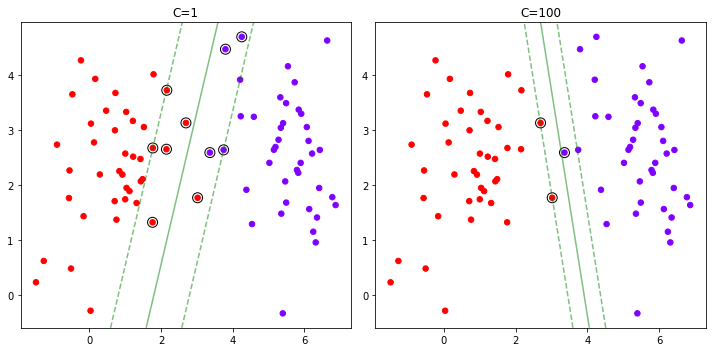

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=80, centers=2, random_state=2042)

plt.figure(figsize=(10, 5))

for i, C in enumerate([1, 100]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42,dual=True,penalty='l2').fit(X, y)
    decision_function = clf.decision_function(X)
  
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, colors='g', levels=[-1, 0, 1], alpha=0.5,linestyles=['--','-','--']
               )
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

#### En las gráficas anteriores se puede ver el efecto de overfitting para diferentes valores de C. Para valores grandes de C, el rango de maniobra es más limitado. 

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]



## Nonlinear SVM Classification

Text(0.5, 1.0, 'Conjunto de datos no separable linealmente')

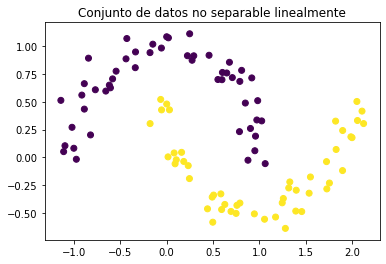

In [3]:
from sklearn.datasets import make_moons
X,y=make_moons(random_state=2,noise=0.1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Conjunto de datos no separable linealmente')

#### Para separar el conjunto de datos representados en la gráfica anterior, se puede agregar caracteristicas polinomiales al modelo LInearSVC mediante la creación de un Pipeline

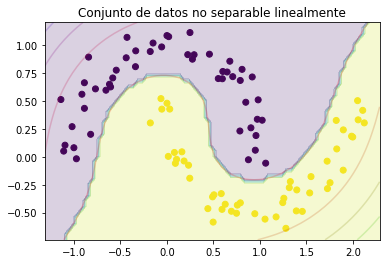

In [8]:
from sklearn.pipeline import Pipeline;from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import PolynomialFeatures

modelo_poly=Pipeline([('pl',PolynomialFeatures(degree=3)),('st',StandardScaler()),
                     ('lsvc',LinearSVC(C=10))])
modelo_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Conjunto de datos no separable linealmente')
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()

xx,yy=np.meshgrid(np.arange(xlim[0],xlim[1],0.05),np.arange(ylim[0],ylim[1],0.05))

Z=modelo_poly.predict(np.c_[xx.ravel(),yy.ravel()])


y_decision = modelo_poly.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,cmap='viridis',alpha=0.2)
plt.contour(xx,yy,y_decision,cmap=plt.cm.brg,alpha=0.2)



### Se observa como el modelo separamente perfectamente el cojunto de datos. Otra forma de obtener el mismo resultado anterior es usando el denominado kernel trick el cual simula la adición de características polinomiales pero sin agregar caracteristicas adicionales cada vez que se aumenta el grado del polinomio